# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

### pandas DataFrame 생성

In [25]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


### DataFrame 자료를 array 형식으로 변환

In [26]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(type(fish)) # class 'pandas.core.frame.DataFrame'
print(type(fish_input)) # class numpy.ndarray

fish_target = fish['Species'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [27]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

### 자료의 표준화

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

## mean and std 추정
ss.fit(train_input)

## 정규화
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
from sklearn.linear_model import SGDClassifier

In [15]:
# loss='log': logistic loss function, max_iter=10 : epoch 횟수
# The maximum number of passes over the training data (aka epochs), default = 1000

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\user\Anaconda3\envs\mytf\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
### 훈련한 모델의 파라메터를 이어서 학습

In [20]:
# Perform one epoch of stochastic gradient descent on given samples.
# 이미 학습된 자료를 바탕으로 SDG를 이용하여 한 번의 Epoch 동안 더 학습
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.9


## 에포크와 과대/과소적합

In [22]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

# Find the unique elements of an
# 중복된 이름 제거
classes = np.unique(train_target)

# print(np.shape(train_scaled))
# print(train_target)
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [23]:
# 임시변수 '-'

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
#     sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

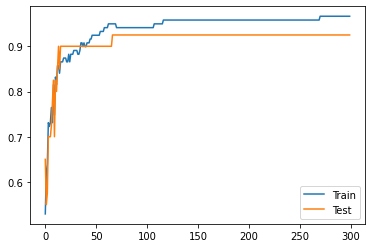

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_score, label = "Train")
plt.plot(test_score, label = "Test")
plt.legend()
plt.show()

### Epoch의 수를 100으로 설정하고 실행

In [31]:
### The stopping criterion (loss > best_loss - tol)

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


### Hinge loss (SVM) 를 이용한 SGDClassifier 

In [12]:
# The possible loss options for regression are 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
